# Decision Boundary in K-Nearest Neighbors (KNN)

## Overview

In K-Nearest Neighbors (KNN) classification, the decision boundary is a critical concept that defines how the algorithm classifies different regions of the feature space. It is formed based on the distances between data points and their nearest neighbors.

## Key Points

### 1. Definition
- **Decision Boundary**: The decision boundary is a surface or line that separates different classes in the feature space. It represents the regions where the classifier's prediction changes from one class to another.

### 2. Characteristics
- **Non-Linear**: The decision boundary in KNN is usually non-linear, particularly in high-dimensional spaces or when the data distribution is complex.
- **Flexible**: KNN can adapt its decision boundary to the shape of the data, making it highly flexible and capable of capturing intricate patterns.

### 3. Influence of `k`
- **Small `k` Values**: With small `k` values (e.g., `k=1` or `k=3`), the decision boundary is more sensitive to noise and may exhibit high variance. This can lead to overfitting.
- **Large `k` Values**: With larger `k` values, the decision boundary becomes smoother and more generalized, which can help in reducing overfitting but may also lead to underfitting.

### 4. Visualization
- **Example**: In a 2D feature space, the decision boundary can be visualized by plotting the contours where the classifier's prediction changes. Different colors or shades can represent different classes.
  



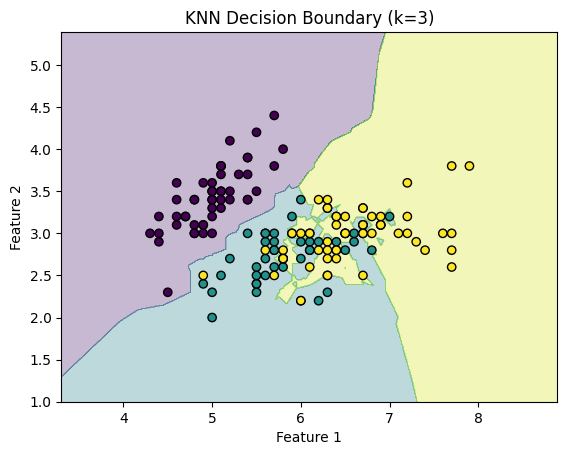

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

# Load data
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Create a KNN classifier
k = 3
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
plt.title(f'KNN Decision Boundary (k={k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Impact of Feature Scaling on Decision Boundary in K-Nearest Neighbors (KNN)

## Overview

Feature scaling is an important preprocessing step in machine learning, particularly for algorithms like K-Nearest Neighbors (KNN) that rely on distance metrics. Scaling features can significantly affect the shape and location of the decision boundary.

## Key Points

### 1. Importance of Feature Scaling
- **Distance Metrics**: KNN uses distance metrics (e.g., Euclidean distance) to determine the proximity of data points. Features with different scales can disproportionately influence the distance calculations.
- **Consistency**: Scaling ensures that all features contribute equally to the distance metric, leading to more balanced and meaningful comparisons.

### 2. Effect on Decision Boundary
- **Without Scaling**:
  - **Irregular Boundaries**: When features are not scaled, features with larger ranges dominate the distance calculations. This can result in irregular and skewed decision boundaries.
  - **Bias**: Features with larger values can bias the decision-making process, potentially distorting the decision boundary.

- **With Scaling**:
  - **Consistent Boundaries**: Scaling features to a similar range (e.g., standardization to mean 0 and variance 1) ensures that each feature contributes equally to the distance metric. This can lead to more consistent and interpretable decision boundaries.
  - **Improved Performance**: Proper scaling often improves the performance of KNN by ensuring that the classifier is not biased towards features with larger ranges.

### 3. Visualization Example

To illustrate the impact of feature scaling on the decision boundary, the following code snippet demonstrates the difference between scaled and unscaled features:

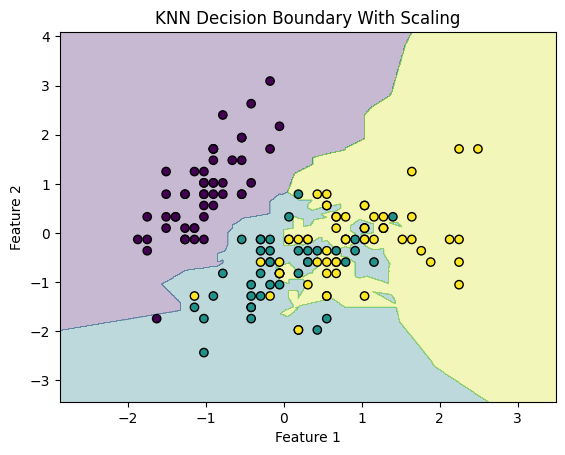

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler

# Load data
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Create a KNN classifier
k = 3
clf = neighbors.KNeighborsClassifier(k)

# Function to plot decision boundary
def plot_decision_boundary(X, y, title, scaler=None):
    if scaler:
        X = scaler.fit_transform(X)

    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# # Plot decision boundary without scaling
# plot_decision_boundary(X, y, 'KNN Decision Boundary Without Scaling')

# Apply feature scaling
scaler = StandardScaler()
plot_decision_boundary(X, y, 'KNN Decision Boundary With Scaling', scaler)

# Effect of `k` on Decision Boundary in K-Nearest Neighbors (KNN)

## Overview

In K-Nearest Neighbors (KNN) classification, the parameter `k` (the number of nearest neighbors to consider) has a significant impact on the shape and smoothness of the decision boundary. The choice of `k` affects how the algorithm classifies different regions in the feature space.

## Key Points

### 1. Definition of `k`
- **`k`**: The number of nearest neighbors used to make a classification decision for a given point.

### 2. Small `k` Values
- **Characteristics**:
  - **High Variance**: Small values of `k` (e.g., `k=1` or `k=3`) make the decision boundary more sensitive to noise and individual data points. This can result in a highly irregular and complex boundary.
  - **Overfitting**: The model may fit the training data too closely, capturing noise and leading to poor generalization on unseen data.

- **Visual Example**:
  - The decision boundary with small `k` values is often jagged and closely follows the training data points.

### 3. Large `k` Values
- **Characteristics**:
  - **High Bias**: Large values of `k` (e.g., `k=10` or `k=50`) lead to a smoother and more generalized decision boundary. This reduces the model's sensitivity to noise but can also make it too simplistic.
  - **Underfitting**: The model may fail to capture the underlying patterns in the data, leading to poor performance on both training and testing data.

- **Visual Example**:
  - The decision boundary with large `k` values appears smoother and less complex, potentially missing finer details in the data distribution.

### 4. Visualization Example

To illustrate the effect of `k` on the decision boundary, the following code snippet demonstrates how the decision boundary changes with different `k` values:



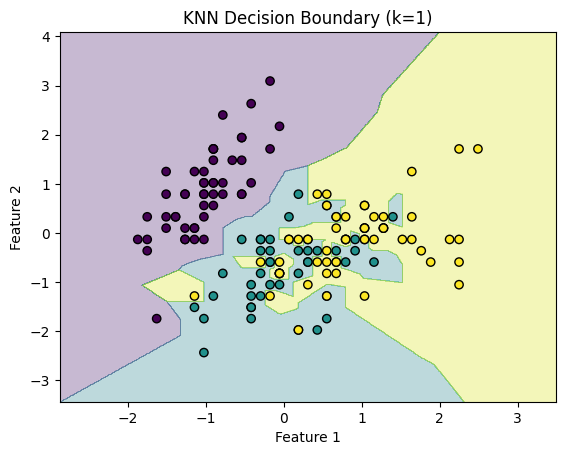

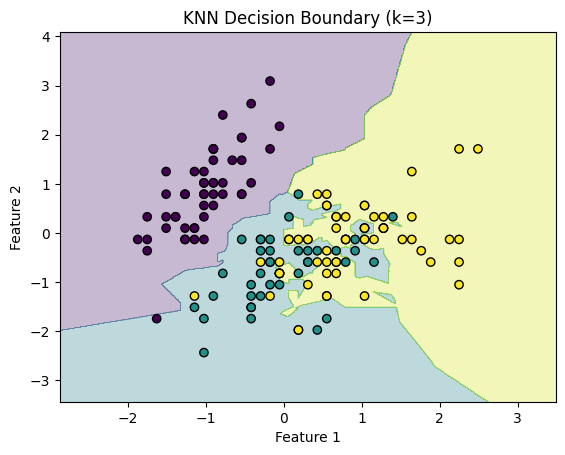

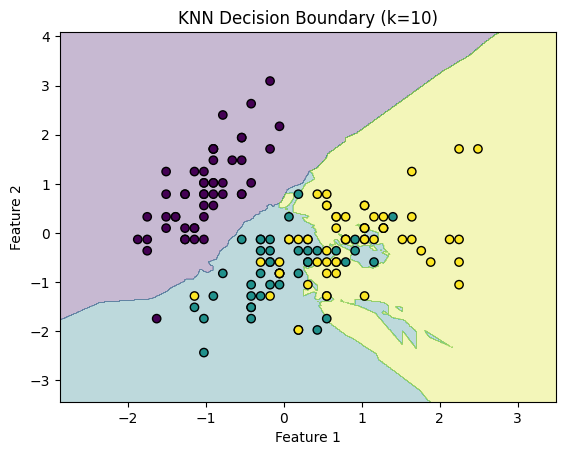

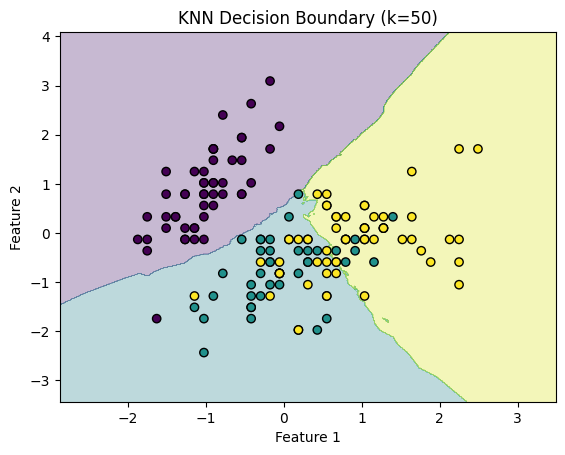

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler

# Load data
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Function to plot decision boundary
def plot_decision_boundary(X, y, k, scaler=None):
    if scaler:
        X = scaler.fit_transform(X)

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(f'KNN Decision Boundary (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Apply feature scaling
scaler = StandardScaler()

# Plot decision boundary for different k values
for k in [1, 3, 10, 50]:
    plot_decision_boundary(X, y, k, scaler)

# Choice of Distance Metric on Decision Boundary in K-Nearest Neighbors (KNN)

## Overview

In K-Nearest Neighbors (KNN) classification, the distance metric used to measure the distance between data points is a crucial factor that affects the decision boundary. The choice of distance metric determines how distances are calculated and, consequently, how the decision boundary is shaped.

## Key Points

### 1. Definition of Distance Metric
- **Distance Metric**: A function used to calculate the distance between two points in the feature space. Different metrics can lead to different interpretations of "closeness."

### 2. Common Distance Metrics

- **Euclidean Distance**:
  - **Formula**: \( d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2} \)
  - **Characteristics**: Measures the straight-line distance between points. Suitable for continuous and numeric data.
  - **Effect on Boundary**: Often leads to circular or spherical decision boundaries.

- **Manhattan Distance**:
  - **Formula**: \( d(x, y) = \sum_{i=1}^{n} |x_i - y_i| \)
  - **Characteristics**: Measures the distance along axes at right angles. Useful for grid-like data and cases where movement is restricted to horizontal and vertical directions.
  - **Effect on Boundary**: Can lead to decision boundaries that are axis-aligned and form a grid-like pattern.

- **Minkowski Distance**:
  - **Formula**: \( d(x, y) = \left(\sum_{i=1}^{n} |x_i - y_i|^p\right)^{1/p} \)
  - **Characteristics**: Generalization of Euclidean and Manhattan distances, with \( p=2 \) for Euclidean and \( p=1 \) for Manhattan.
  - **Effect on Boundary**: Decision boundary shape varies with the value of \( p \). Smaller values of \( p \) make the boundary more grid-like, while larger values make it smoother.

- **Cosine Similarity**:
  - **Formula**: \( \text{similarity}(x, y) = \frac{x \cdot y}{\|x\| \|y\|} \)
  - **Characteristics**: Measures the cosine of the angle between two vectors. Often used for text data and cases where only the direction of data points is relevant.
  - **Effect on Boundary**: Results in decision boundaries based on angular relationships rather than absolute distances.

### 3. Impact on Decision Boundary

- **Distance Calculation**: The choice of distance metric affects how distances are computed and how the nearest neighbors are identified. This in turn influences the shape of the decision boundary.
- **Boundary Shape**:
  - **Euclidean Distance**: Generally leads to smooth, convex boundaries.
  - **Manhattan Distance**: Can result in piecewise linear boundaries.
  - **Minkowski Distance**: Boundary shape transitions between those of Euclidean and Manhattan distances depending on \( p \).
  - **Cosine Similarity**: Boundaries are based on angle rather than distance, affecting how regions are classified.

### 4. Visualization Example

To illustrate the effect of different distance metrics on the decision boundary, the following code snippet demonstrates how various distance metrics impact the boundary:



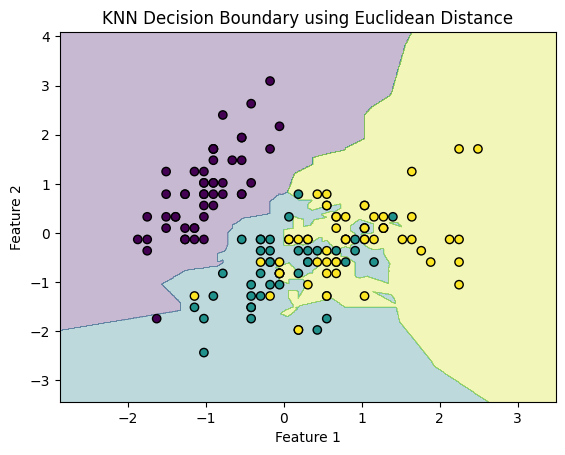

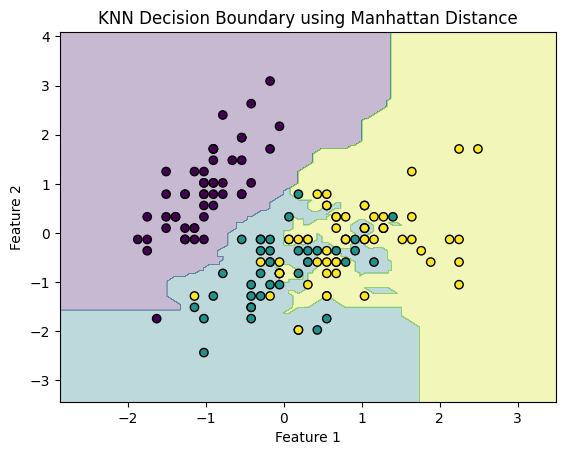

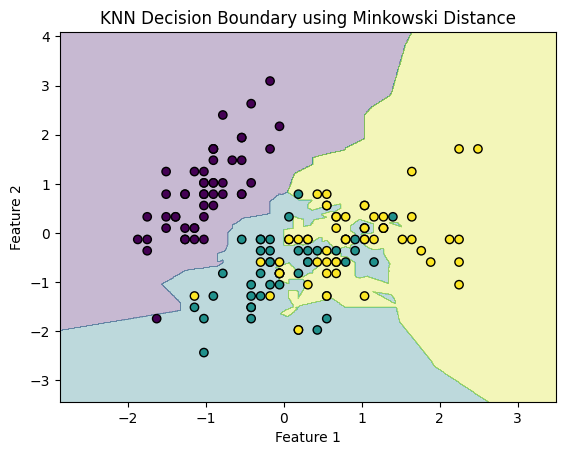

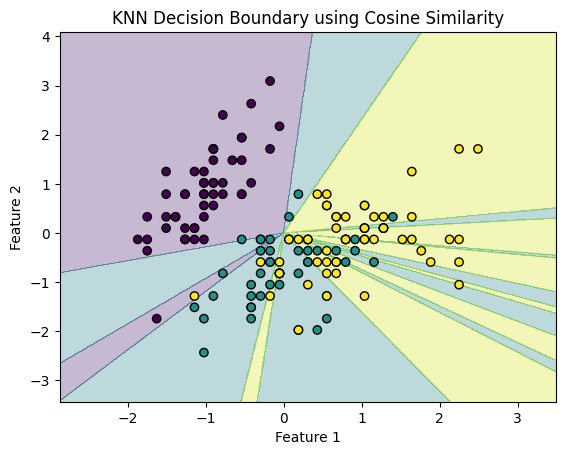

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler

# Load data
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Function to plot decision boundary
def plot_decision_boundary(X, y, metric, title):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    clf = neighbors.KNeighborsClassifier(n_neighbors=3, metric=metric)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries for different metrics
metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine']
titles = ['Euclidean Distance', 'Manhattan Distance', 'Minkowski Distance', 'Cosine Similarity']

for metric, title in zip(metrics, titles):
    plot_decision_boundary(X, y, metric, f'KNN Decision Boundary using {title}')